<a href="https://colab.research.google.com/github/ukir-rrrr/python_image/blob/main/test_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#　ライブラリのインポート
!pip install gradio -q

In [ ]:
%tensorflow_version 2.x

import tensorflow as tf
import gradio as gr

print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.12.0


In [ ]:
tf.get_logger().setLevel("ERROR")

In [ ]:
# TensorflowでAIモデル作成
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

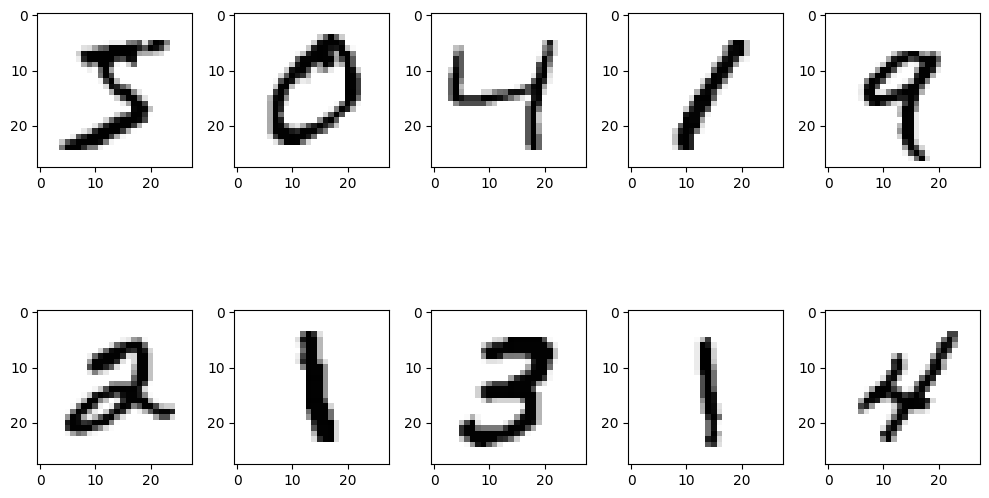

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (10, 10), tight_layout = True)

n = 0
for i in range(2):
  for j in range(5):
    #グラフ表示
    ax[i][j].imshow(x_train[n], cmap = plt.cm.binary)
    n += 1

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2646 - accuracy: 0.9242
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1162 - accuracy: 0.9650
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0801 - accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0596 - accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0449 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0364 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0292 - accuracy: 0.9910
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0242 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0197 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0

In [ ]:
_, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.0755 - accuracy: 0.9824 - 1s/epoch - 4ms/step
0.9824000000953674


In [ ]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


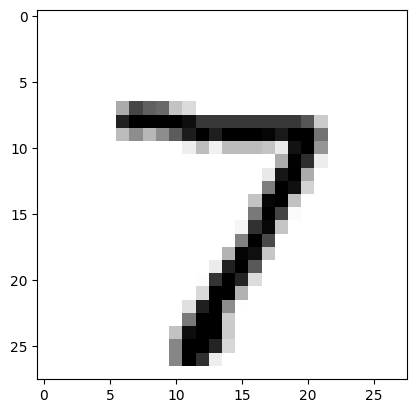

In [ ]:
plt.imshow(x_test[0], cmap=plt.cm.binary)
pass

In [ ]:
import numpy as np

np.argmax(predictions[0])

7

In [ ]:
# Gradioで認識アプリ
def recognize_digit(img):
  img = img.reshape(1, 28, 28)
  prediction = model.predict(img).tolist()[0]
  return {str(i): prediction[i] for i in range(10)}

label = gr.outputs.Label(num_top_classes = 4)
interface = gr.Interface(fn=recognize_digit, inputs = 'sketchpad', outputs=label, live=True, title='Digit Recognizer')

/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


In [ ]:
interface.launch(share = True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://5863a1a74cff4fbbc7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
